In [1]:
import pandas as pd

In [2]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
import sys
sys.path.append("/home/konajain/code/lobSimulations")
from hawkes import dataLoader

ModuleNotFoundError: No module named 'hawkes'

In [ ]:
l = dataLoader.Loader("TSLA.OQ", dt.date(2019,1,2), dt.date(2019,2,1), nlevels = 2, dataPath = "/SAN/fca/Konark_PhD_Experiments/extracted/")
data = l.load()

In [6]:
# ask price new < ask price prev or bid price new > bid price prev and event type = LO
for i in range(len(data)):
    df = data[i]
    df['BidDiff'] = df['Bid Price 1'].diff()
    df['AskDiff'] = df['Ask Price 1'].diff()
    data[i] = df
df_inspread = pd.concat([df.loc[(df.Type == 1)&((df['BidDiff'] > 0)|(df['AskDiff'] < 0))] for df in data])
df_inspread['prev spread'] = df_inspread.BidDiff - df_inspread.AskDiff + df_inspread['Ask Price 1'] - df_inspread['Bid Price 1']

<Axes: >

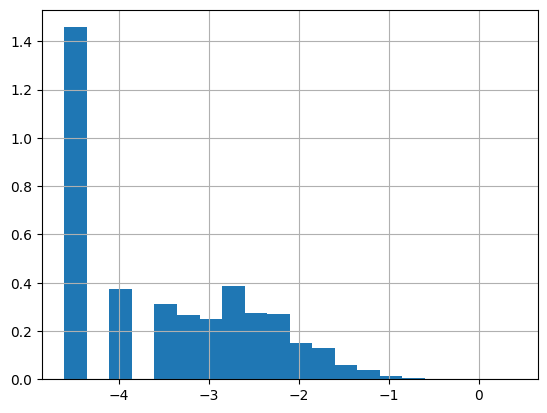

In [34]:
(df_inspread.BidDiff - df_inspread.AskDiff).apply(np.log).hist(bins=20, density = True)

In [30]:
sum((df_inspread.BidDiff - df_inspread.AskDiff) < 0.015)/len(df_inspread)

0.36522106824243894

In [35]:
sum((df_inspread.BidDiff - df_inspread.AskDiff) < 0.025)/len(df_inspread)

0.45881293117844335

In [36]:
np.median((df_inspread.BidDiff - df_inspread.AskDiff).values)

0.029999999999972715

In [37]:
a = []
for i in range(len(data)):
    df = data[i]
    a = np.append(a,df['Ask Price 2'] - df['Ask Price 1'].values)
    a = np.append(a, df['Bid Price 1'] - df['Bid Price 2'].values)
print(np.median(a))

0.029999999999972715


In [18]:
df_inspread['seqNo'] = np.arange(len(df_inspread))

In [60]:
df_inspread_bid = df_inspread.loc[df_inspread.TradeDirection == 1]
df_inspread_ask = df_inspread.loc[df_inspread.TradeDirection == -1]

In [61]:
df_inspread_bid = df_inspread_bid.set_index([df_inspread_bid.apply(lambda x : dt.datetime.strptime(x['Date'], "%Y-%m-%d")+dt.timedelta(seconds=x['Time']), axis = 1 ), 'seqNo'])
df_inspread_bid.head()

,,Time,Type,OrderID,Size,Price,TradeDirection,tmp,Ask Price 1,Ask Size 1,Bid Price 1,Bid Size 1,Ask Price 2,Ask Size 2,Bid Price 2,Bid Size 2,Date,BidDiff,AskDiff,prev spread
,seqNo,,,,,,,,,,,,,,,,,,,
2019-01-02 09:30:00.803732,1,34200.803732,1,11723272,100,3061900,1,NaN,307.00,2365,306.19,100,307.18,158,306.06,3,2019-01-02,0.13,0.0,0.94
2019-01-02 09:30:00.803736,2,34200.803736,1,11723284,50,3063600,1,NaN,307.00,2365,306.36,50,307.18,158,306.19,200,2019-01-02,0.17,0.0,0.81
2019-01-02 09:30:00.832312,4,34200.832312,1,11733916,100,3061900,1,NaN,307.00,2365,306.19,100,307.18,158,306.06,3,2019-01-02,0.13,0.0,0.94
2019-01-02 09:30:01.240672,9,34201.240672,1,11817460,5,3060100,1,NaN,307.00,1637,306.01,5,307.18,158,306.00,1206,2019-01-02,0.01,0.0,1.00
2019-01-02 09:30:01.411242,14,34201.411242,1,11835112,15,3060000,1,NaN,306.17,15,306.00,15,306.34,50,305.80,33,2019-01-02,0.20,0.0,0.37


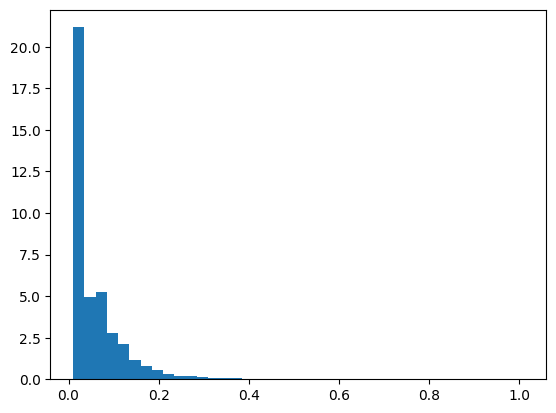

In [62]:
plt.hist(df_inspread_bid.BidDiff, bins = 40, density=True)
plt.show()

In [63]:
df_inspread_ask = df_inspread_ask.set_index([df_inspread_ask.apply(lambda x : dt.datetime.strptime(x['Date'], "%Y-%m-%d")+dt.timedelta(seconds=x['Time']), axis = 1 ), 'seqNo'])
df_inspread_ask.head()

,,Time,Type,OrderID,Size,Price,TradeDirection,tmp,Ask Price 1,Ask Size 1,Bid Price 1,Bid Size 1,Ask Price 2,Ask Size 2,Bid Price 2,Bid Size 2,Date,BidDiff,AskDiff,prev spread
,seqNo,,,,,,,,,,,,,,,,,,,
2019-01-02 09:30:00.781848,0,34200.781848,1,9905484,500,3066700,-1,NaN,306.67,500,306.06,3,307.00,200,306.00,300,2019-01-02,0.0,-0.33,0.94
2019-01-02 09:30:00.819050,3,34200.819050,1,11730308,4,3066700,-1,NaN,306.67,4,306.19,100,307.00,2365,306.06,3,2019-01-02,0.0,-0.33,0.81
2019-01-02 09:30:01.108206,5,34201.108206,1,11798748,100,3068100,-1,NaN,306.81,100,306.00,1231,307.00,1737,305.80,33,2019-01-02,0.0,-0.19,1.00
2019-01-02 09:30:01.108210,6,34201.108210,1,11798756,50,3065300,-1,NaN,306.53,50,306.00,1231,306.81,200,305.80,33,2019-01-02,0.0,-0.28,0.81
2019-01-02 09:30:01.202193,7,34201.202193,1,11813032,30,3067500,-1,NaN,306.75,30,306.00,1206,307.00,1737,305.80,33,2019-01-02,0.0,-0.25,1.00


In [67]:
tau = 1e-6
s = df_inspread_bid.sort_index(ascending=False).reset_index().set_index('level_0').rolling(window = dt.timedelta(seconds=tau))['TradeDirection'].count()
s=s.to_frame()
s['seqNo'] = df_inspread_bid.sort_index(ascending=False).reset_index().set_index('level_0')['seqNo']
s = s.reset_index().set_index(['level_0','seqNo'])
df_inspread_bid['Count0.01sec'] = s

In [68]:
df_inspread_bid['prev spread ticks'] = (df_inspread_bid['prev spread']*100).apply(np.round).astype(int)

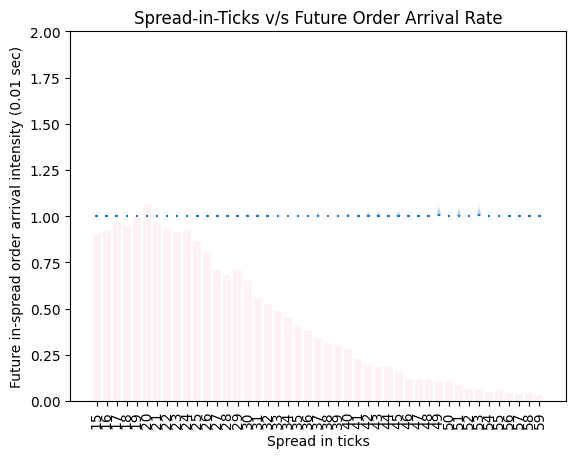

In [69]:
plt.figure()
df_inspread_bid  = df_inspread_bid.loc[df_inspread_bid['prev spread ticks'] < 60]
df_inspread_bid  = df_inspread_bid.loc[df_inspread_bid['prev spread ticks'] > 14]
plt.violinplot(df_inspread_bid.groupby("prev spread ticks")['Count0.01sec'].apply(np.array).values , showmeans=True,  showmedians=False, showextrema = False)
plt.ylim([0,2])
plt.title('Spread-in-Ticks v/s Future Order Arrival Rate')
plt.bar(df_inspread_bid["prev spread ticks"].sort_values().unique() - 14  , 20*df_inspread_bid.groupby("prev spread ticks")['Count0.01sec'].count().values/len(df_inspread_bid), alpha=0.2, color='pink')
# plt.plot(df_inspread_bid["prev spread ticks"].sort_values().unique() -1,  np.exp(-0.0523)*(df_inspread_bid_f["prev spread ticks"].sort_values().unique()**0.3889), color = 'r')
plt.xticks(ticks = np.arange(1, len(df_inspread_bid["prev spread ticks"].unique())+1), labels = df_inspread_bid["prev spread ticks"].sort_values().unique() , rotation = 90)
plt.xlabel("Spread in ticks")
plt.ylabel("Future in-spread order arrival intensity (0.01 sec)")
plt.savefig("spreadInTicks.jpg")
plt.show()

In [47]:
df_inspread_bid['prev spread ticks'].median()

22.0

# new way

In [15]:
inspreadInt = []

counts = []

In [16]:
for d in pd.date_range(dt.date(2019,1,2), dt.date(2019,3,31)):
            l = dataLoader.Loader("AAPL.OQ", d, d, nlevels = 2, dataPath = "/SAN/fca/Konark_PhD_Experiments/extracted/")
            data = l.load()
            if len(data):
                # ask price new < ask price prev or bid price new > bid price prev and event type = LO
                for i in range(len(data)):
                    df = data[i]
                    df['BidDiff'] = df['Bid Price 1'].diff()
                    df['AskDiff'] = df['Ask Price 1'].diff()
                    df = df.iloc[1:]
                    df['inspread'] = ((df.Type == 1)&((df['BidDiff'] > 0)|(df['AskDiff'] < 0))).astype(int)
                    df['prev spread'] = df.BidDiff - df.AskDiff + df['Ask Price 1'] - df['Bid Price 1']
                    df['seqNo'] = np.arange(len(df))
                    data[i] = df
                # df_inspread_bid = df_inspread.loc[df_inspread.TradeDirection == 1]
        
                for df_inspread in data:
                    df_inspread_bid = df_inspread.loc[df_inspread.TradeDirection == 1]
                    df_inspread_bid = df_inspread_bid.set_index([df_inspread_bid.apply(lambda x : dt.datetime.strptime(x['Date'], "%Y-%m-%d")+dt.timedelta(seconds=x['Time']), axis = 1 ), 'seqNo'])
                    tau = 1e-6
                    s = df_inspread_bid.sort_index(ascending=False).reset_index().set_index('level_0').rolling(window = dt.timedelta(seconds=tau))['inspread'].sum()
                    s=s.to_frame()
                    s['seqNo'] = df_inspread_bid.sort_index(ascending=False).reset_index().set_index('level_0')['seqNo']
                    s = s.reset_index().set_index(['level_0','seqNo'])
                    df_inspread_bid['Count0.01sec'] = s
                    df_inspread_bid['prev spread ticks'] = (df_inspread_bid['prev spread']*100).apply(np.round).astype(int)
                    inspreadInt.append(df_inspread_bid.groupby("prev spread ticks")['Count0.01sec'].apply(np.average))
                    counts.append(df_inspread_bid.groupby("prev spread ticks")['Count0.01sec'].count())

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-02_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-03_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff'] > 0)|(df['AskDiff'] < 0))).astype(int)
/tmp/ipykernel_62553/2695096141.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-04_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff'] > 0)|(df['AskDiff'] < 0))).astype(int)
/tmp/ipykernel_62553/2695096141.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-07_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-08_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-09_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff'] > 0)|(df['AskDiff'] < 0))).astype(int)
/tmp/ipykernel_62553/2695096141.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-10_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-11_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-14_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-15_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-16_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff'] > 0)|(df['AskDiff'] < 0))).astype(int)
/tmp/ipykernel_62553/2695096141.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-17_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-18_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-22_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-23_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-24_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-25_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-28_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-29_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-30_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-01-31_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-01_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-04_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-05_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-06_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-07_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-08_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-11_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-12_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff'] > 0)|(df['AskDiff'] < 0))).astype(int)
/tmp/ipykernel_62553/2695096141.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-13_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff'] > 0)|(df['AskDiff'] < 0))).astype(int)
/tmp/ipykernel_62553/2695096141.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-14_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-15_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff'] > 0)|(df['AskDiff'] < 0))).astype(int)
/tmp/ipykernel_62553/2695096141.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-19_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-20_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-21_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-22_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff'] > 0)|(df['AskDiff'] < 0))).astype(int)
/tmp/ipykernel_62553/2695096141.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-25_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff'] > 0)|(df['AskDiff'] < 0))).astype(int)
/tmp/ipykernel_62553/2695096141.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-26_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-27_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-02-28_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff'] > 0)|(df['AskDiff'] < 0))).astype(int)
/tmp/ipykernel_62553/2695096141.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

/SAN/fca/Konark_PhD_Experiments/extracted/AAPL_2019-03-01_34200000_57600000_message_10.csv


/tmp/ipykernel_62553/2695096141.py:3: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
/tmp/ipykernel_62553/2695096141.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inspread'] = ((df.Type == 1)&((df['BidDiff']

KeyboardInterrupt: 

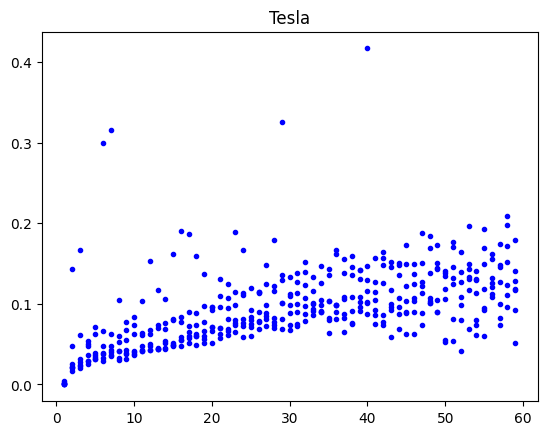

In [90]:
for inD in inspreadInt:
    inD = inD.loc[inD.index < 60]
    plt.plot(inD, 'b.')
    plt.title("Tesla")

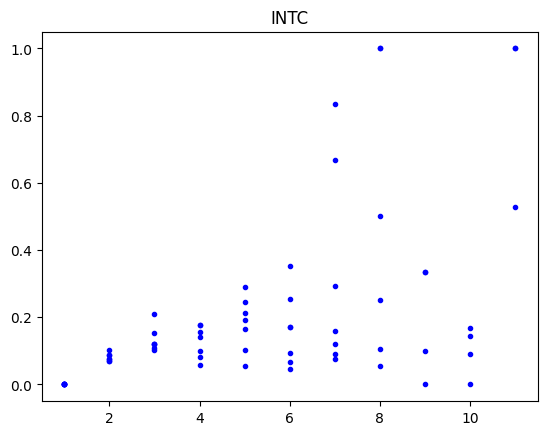

In [95]:
for inD in inspreadInt:
    inD = inD.loc[inD.index < 12]
    plt.plot(inD, 'b.')
    plt.title("INTC")

In [1]:
import pickle
with open("/SAN/fca/Konark_PhD_Experiments/spread_data_AAPL.OQ_2019-01-02_2019-03-31", "rb") as f:
    inspreadInt, counts = pickle.load(f)

In [ ]:
counts

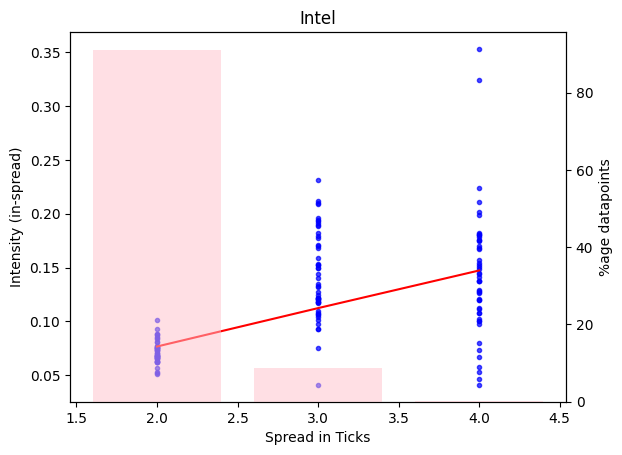

In [183]:
fig, ax1 = plt.subplots()
x = weights.index.unique()
ax2 = ax1.twinx()

ax2.bar(x+1, 100*weights.reset_index().groupby('prev spread ticks').mean().values.flatten(), color = 'pink', alpha = 0.5)

ax1.plot(df, 'b.', alpha = 0.7)
ax1.set_title("Intel")
y = [np.exp(-3.22)*i**0.9410 for i in (x+1)]
ax1.plot(x+1, y, 'r')

ax1.set_xlabel('Spread in Ticks')
ax1.set_ylabel('Intensity (in-spread)')
ax2.set_ylabel('%age datapoints')

plt.show()

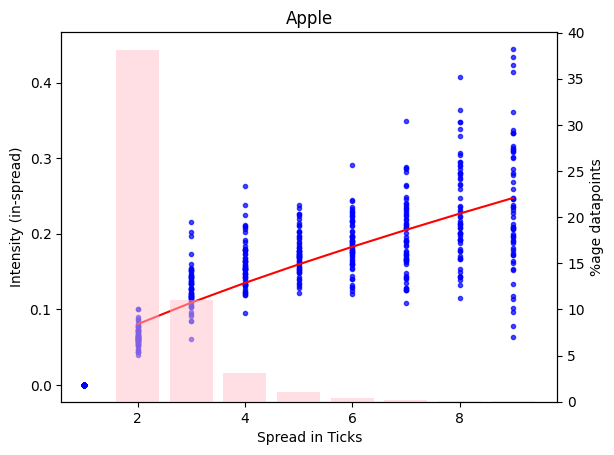

In [188]:
fig, ax1 = plt.subplots()
x = [2,3,4,5,6,7,8,9]
ax2 = ax1.twinx()
ax2.bar(x, 100*weights.reset_index().groupby('prev spread ticks').mean().values.flatten(), color = 'pink', alpha = 0.5)

for inD in inspreadInt:
    inD = inD.loc[inD.index < 10]
    ax1.plot(inD, 'b.', alpha = 0.7)
    ax1.set_title("Apple")

y = [np.exp(-3.04)*i**0.7479 for i in x]
ax1.plot(x, y, 'r')

ax1.set_xlabel('Spread in Ticks')
ax1.set_ylabel('Intensity (in-spread)')
ax2.set_ylabel('%age datapoints')

plt.show()

In [186]:
import statsmodels.api as sm
df = pd.concat(inspreadInt)
c = pd.concat([c/c.sum() for c in counts])
df = df.loc[df.index > 1]
df = df.loc[df.index < 10]
X = np.log(df.index.values)
y = df.apply(lambda x: np.log(x) if x > 0 else -4)
X = sm.add_constant(X)

c = c.loc[c.index > 1]
c = c.loc[c.index < 10]
weights = c
mod_wls = sm.OLS(y,X) #sm.WLS(y, X, weights=weights)
res_wls = mod_wls.fit()
print(res_wls.summary())

                            OLS Regression Results                            
Dep. Variable:           Count0.01sec   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     840.5
Date:                Fri, 22 Dec 2023   Prob (F-statistic):          4.89e-108
Time:                        13:54:28   Log-Likelihood:                -61.374
No. Observations:                 488   AIC:                             126.7
Df Residuals:                     486   BIC:                             135.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0458      0.043    -70.643      0.0

In [175]:
c

prev spread ticks
2    0.076126
3    0.001253
4    0.000392
2    0.089068
3    0.000545
       ...   
3    0.001471
4    0.000259
2    0.063315
3    0.001057
4    0.000401
Name: Count0.01sec, Length: 150, dtype: float64

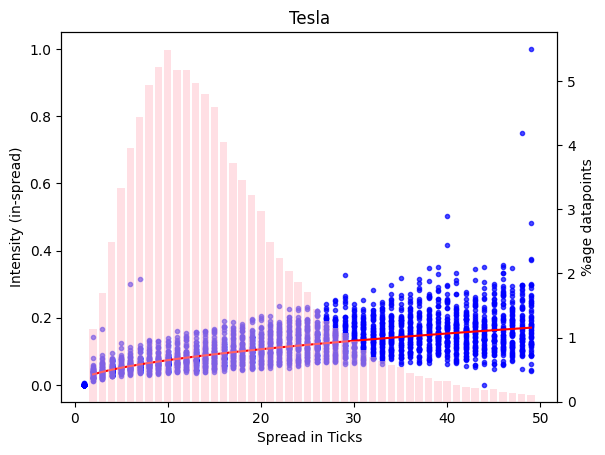

In [123]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
x = weights.reset_index().groupby('prev spread ticks').mean().index
ax2.bar(x, 100*weights.reset_index().groupby('prev spread ticks').mean().values.flatten(), color = 'pink', alpha = 0.5)

for inD in inspreadInt:
    inD = inD.loc[inD.index < 50]
    ax1.plot(inD, 'b.', alpha = 0.7)
    ax1.set_title("Tesla")
x = np.arange(2,50)
y = [np.exp(-3.8257)*i**0.5283 for i in x]
ax1.plot(x, y, 'r')

ax1.set_xlabel('Spread in Ticks')
ax1.set_ylabel('Intensity (in-spread)')
ax2.set_ylabel('%age datapoints')

plt.show()

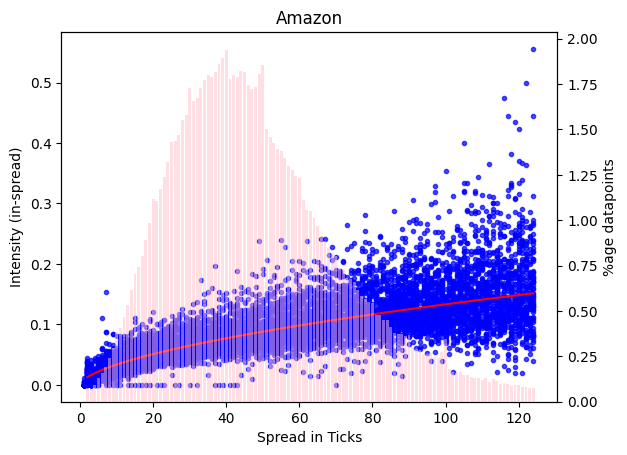

In [134]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
x = weights.reset_index().groupby('prev spread ticks').mean().index
ax2.bar(x, 100*weights.reset_index().groupby('prev spread ticks').mean().values.flatten(), color = 'pink', alpha = 0.5)

for inD in inspreadInt:
    inD = inD.loc[inD.index < 125]
    ax1.plot(inD, 'b.', alpha = 0.7)
    ax1.set_title("Amazon")
x = np.arange(2,125)
y = [np.exp(-4.7631)*i**0.5966 for i in x]
ax1.plot(x, y, 'r')

ax1.set_xlabel('Spread in Ticks')
ax1.set_ylabel('Intensity (in-spread)')
ax2.set_ylabel('%age datapoints')

plt.show()

In [88]:
# intc : 0.941
# apple : 0.7479
# tsla: 0.5283
# amzn: 0.5966

array([0.38134231, 0.11026085, 0.03075089, 0.01040742, 0.00419026,
       0.00180496, 0.00076489, 0.0004359 ])

# TOD parameterization

In [ ]:
dfs = []
for d in pd.date_range(dt.date(2019,1,2), dt.date(2019,3,31)):
    try:
        df = pd.read_csv("/SAN/fca/Konark_PhD_Experiments/extracted/INTC.OQ_"+d.strftime("%Y-%m-%d")+"_12D.csv")
        dfs.append(df)
    except:
        continue
df = pd.concat(dfs)

/home/konajain/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Special Date:
specDate = {
            "MEXP" : [dt.date(2019,1,18), dt.date(2019,2,15), dt.date(2019,4,18), dt.date(2019,5,17), dt.date(2019,7,19), dt.date(2019,8,16), dt.date(2019,10,18), dt.date(2019,11,15), dt.date(2020,1,17), dt.date(2020,2,21), dt.date(2020,4,17), dt.date(2020,5,15)],
            "FOMC3" : [dt.date(2019,1,30), dt.date(2019,3,20), dt.date(2019,5,1), dt.date(2019,6,19), dt.date(2019,7,31), dt.date(2019,9,18), dt.date(2019,10,30), dt.date(2019,12,11), dt.date(2020,1,29), dt.date(2020,3,18), dt.date(2020,4,29), dt.date(2020,6,10)],
            "MEND" : [dt.date(2019,1,31), dt.date(2019,4,30), dt.date(2019,5,31), dt.date(2019,10,31), dt.date(2020,1,31), dt.date(2020,4, 30)],
            "MSCIQ" : [dt.date(2019,2,28), dt.date(2019,8,27), dt.date(2020,2,28)],
            "QEXP" : [dt.date(2019,3,15), dt.date(2019,6,21), dt.date(2019,9,20), dt.date(2019,12,20), dt.date(2020,3,20), dt.date(2020,6,19) ],
            "QEND" : [dt.date(2019,3,29), dt.date(2019,6,28), dt.date(2019,9,30), dt.date(2019,12,31), dt.date(2020,3,31), dt.date(2020,6,30)],
            "MSCIS" : [dt.date(2019,5,28), dt.date(2019,11,26), dt.date(2020,5,29)],
            "HALF" : [dt.date(2019,7,3), dt.date(2019,11,29), dt.date(2019,12,24)],
            "DISRUPTION" : [dt.date(2020,3,9), dt.date(2020,3,12), dt.date(2020,3,16)],
            "RSL" : [dt.date(2020,6,26)]
            }

In [ ]:
df.head()

In [ ]:
df.event.unique()

In [ ]:
e = "lo_deep_Bid"
df['halfHourId'] = df['Time'].apply(lambda x: int(np.floor(x/1800)))

In [ ]:
df = df.loc[df.Date.apply(lambda x: x not in ["2019-01-09", "2019-01-18", "2019-01-30", "2019-01-31"])] 

In [ ]:


for e in df.event.unique():
    fig = plt.figure()
    df_e = df.loc[df.event == e].groupby(["Date","halfHourId"])['Time'].count().reset_index().groupby("halfHourId").mean()
    plt.plot(df_e)
    plt.title(e)
    plt.show()

In [ ]:
for e in df.event.unique():
    fig = plt.figure()
    df_e = df.loc[df.event == e].groupby(["Date","halfHourId"])['Time'].count().reset_index().groupby("halfHourId").mean()
    plt.plot(df_e)
    plt.title(e)
    plt.show()

In [11]:
df_e.to_dict()['Time']

{0: 2380.3536585365855,
 1: 1696.4567901234568,
 2: 1338.6296296296296,
 3: 1170.9135802469136,
 4: 1098.1358024691358,
 5: 913.1851851851852,
 6: 899.320987654321,
 7: 821.8641975308642,
 8: 784.6666666666666,
 9: 874.2592592592592,
 10: 905.7901234567901,
 11: 1011.074074074074,
 12: 1686.8395061728395}

# Average Spread

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

In [13]:

ric = "TSLA.OQ"

In [ ]:
spreads = []
for d in pd.date_range(dt.date(2019,1,2), dt.date(2019,3,31)):
            l = dataLoader.Loader(ric, d, d, nlevels = 2, dataPath = "/SAN/fca/Konark_PhD_Experiments/extracted/")
            data = l.load()
            if len(data):
                for df in data:
                    df['spread'] = df['Ask Price 1'] - df['Bid Price 1']
                    s = df[['Time','spread']]
                    s['Time'] = s['Time'].diff()
                    spr = s.iloc[1:]
            spreads+=[sum(spr.Time*spr.spread)/(sum(spr.Time))]

In [25]:
# aapl
sum(spr.Time*spr.spread)/(sum(spr.Time))

0.01690555032073594

In [8]:
# intc
np.average(spreads)

0.010145469326510061

In [12]:
# tsla
np.average(spreads)

0.1617587373900753

In [15]:
# Amz
np.average(spreads)

0.5183059875370096

# Order Size Distributions

In [7]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [8]:
ric = "INTC.OQ"

In [9]:
col = ['Ask Price ', 'Ask Size ', 'Bid Price ', 'Bid Size ']
if True:
            theNames = []
            cols = []
            for i in range(1, 11):
                for j in col:
                    cols.append(str(j)+str(i))
                    theNames.append(str(j) + str(i))

In [10]:
data = pd.read_csv("/SAN/fca/Konark_PhD_Experiments/extracted/AMZN_2019-01-02_34200000_57600000_orderbook_10.csv", names=theNames)
theMessageBook = pd.read_csv("/SAN/fca/Konark_PhD_Experiments/extracted/AMZN_2019-01-02_34200000_57600000_message_10.csv", names=['Time', 'Type', 'OrderID', 'Size', 'Price', 'TradeDirection', 'tmp'])
data = pd.concat([theMessageBook , data], axis = 1)

/home/konajain/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
auctTime = data.loc[data.Type == 6].iloc[0].Time
data =data[data.Time > auctTime]
data

,Time,Type,OrderID,Size,Price,TradeDirection,tmp,Ask Price 1,Ask Size 1,Bid Price 1,...,Bid Price 8,Bid Size 8,Ask Price 9,Ask Size 9,Bid Price 9,Bid Size 9,Ask Price 10,Ask Size 10,Bid Price 10,Bid Size 10
60,34200.071059,4,5277865,2,14652200,-1,NaN,14657500,10,14651500,...,14635600,1,14695000,5,14635000,500,14700000,112,14620000,16
61,34200.071059,4,8494337,10,14657500,-1,NaN,14660000,527,14651500,...,14635600,1,14700000,112,14635000,500,14710000,6,14620000,16
62,34200.071707,4,3629729,3,14651500,1,NaN,14660000,527,14651500,...,14635600,1,14700000,112,14635000,500,14710000,6,14620000,16
63,34200.071707,4,7534141,1,14651500,1,NaN,14660000,527,14650900,...,14635000,500,14700000,112,14620000,16,14710000,6,14611600,1
64,34200.072077,1,8657297,10,14660000,-1,NaN,14660000,537,14650900,...,14635000,500,14700000,112,14620000,16,14710000,6,14611600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880432,57599.977380,1,400111773,602,15391300,-1,NaN,15391300,602,15390100,...,15387300,382,15400600,3,15387100,500,15401600,100,15386800,5
880433,57599.977422,4,400111773,1,15391300,-1,NaN,15391300,601,15390100,...,15387300,382,15400600,3,15387100,500,15401600,100,15386800,5
880434,57599.986050,4,400111773,1,15391300,-1,NaN,15391300,600,15390100,...,15387300,382,15400600,3,15387100,500,15401600,100,15386800,5
880435,57599.994558,4,400111773,1,15391300,-1,NaN,15391300,599,15390100,...,15387300,382,15400600,3,15387100,500,15401600,100,15386800,5


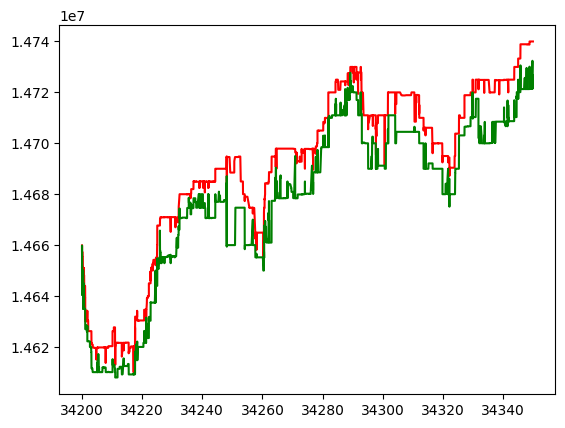

In [6]:
data_s = data.loc[data.Time < 34200+150]
plt.plot(data_s.Time, data_s["Ask Price 1"].values, color = "red")
plt.plot(data_s.Time, data_s["Bid Price 1"].values, color = "green")


In [31]:
data_s.iloc[45:55][data_s.columns[:11]]

,Time,Type,OrderID,Size,Price,TradeDirection,tmp,Ask Price 1,Ask Size 1,Bid Price 1,Bid Size 1
220,34200.810947,1,14021998,20,510000,1,NaN,510600,100,510400,144
221,34200.812667,1,14022554,180,510000,1,NaN,510600,100,510400,144
222,34200.813754,4,7041790,83,510400,1,NaN,510600,100,510400,61
223,34200.813754,4,7574214,1,510400,1,NaN,510600,100,510400,60
224,34200.813754,4,8731914,10,510400,1,NaN,510600,100,510400,50
225,34200.813754,4,8815870,6,510400,1,NaN,510600,100,510400,44
226,34200.815820,1,14024154,100,510500,-1,NaN,510500,100,510400,44
227,34200.816042,3,14024154,100,510500,-1,NaN,510600,100,510400,44
228,34200.816735,1,14024546,100,510500,-1,NaN,510500,100,510400,44
229,34200.816801,1,14024594,100,509600,1,NaN,510500,100,510400,44


In [21]:
9.5*60*60

34200.0

In [11]:
sizes = {}
for d in pd.date_range(dt.date(2019,1,2), dt.date(2019,3,31)):
    try:
        data = pd.read_csv("/SAN/fca/Konark_PhD_Experiments/extracted/"+ric+"_"+ d.strftime("%Y-%m-%d") +"_12D.csv")
    except: 
        continue
    df = data.groupby("event").Size.apply(list).to_dict()
    for k, v in df.items():
        sizes[k] = sizes.get(k, []) + v

/home/konajain/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


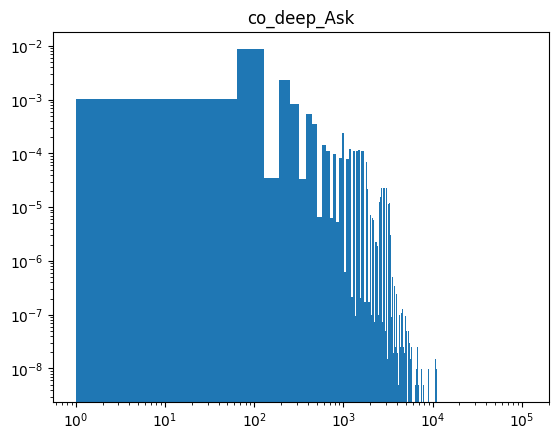

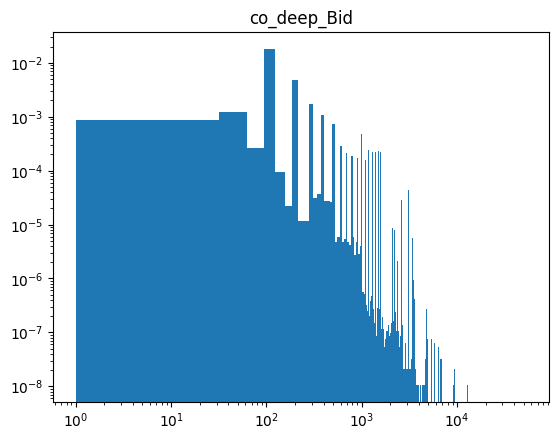

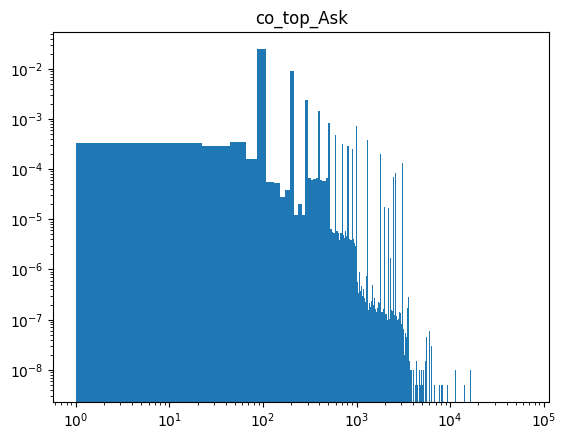

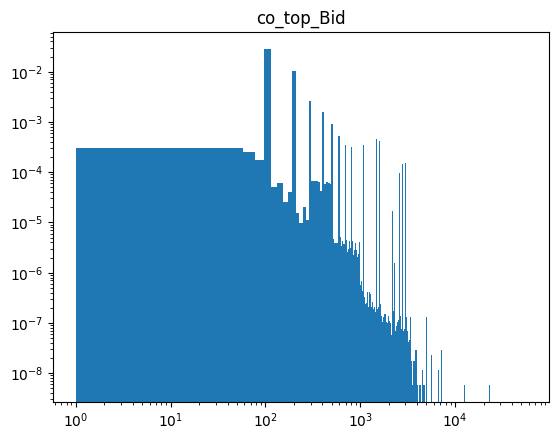

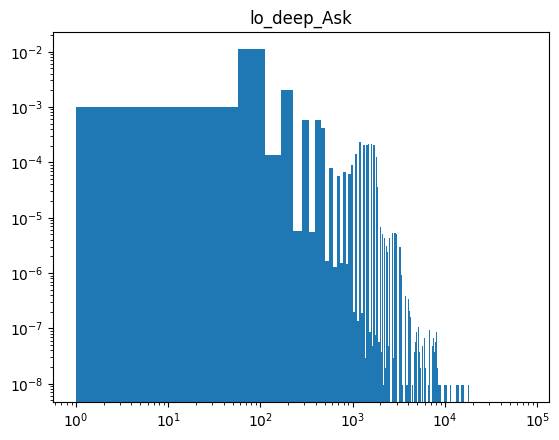

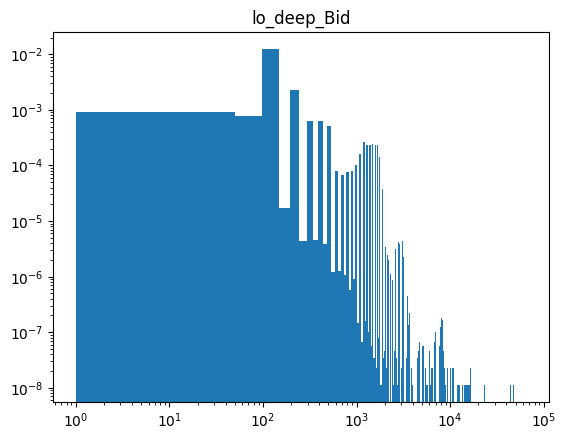

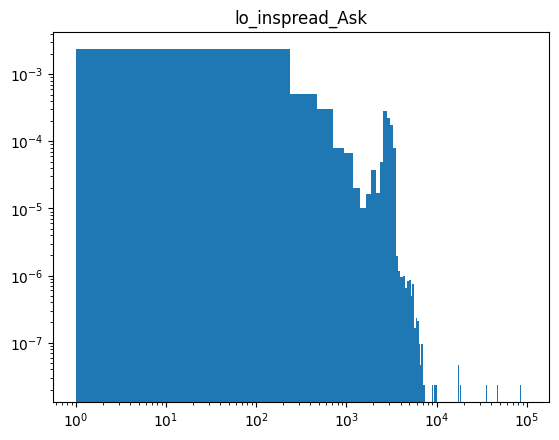

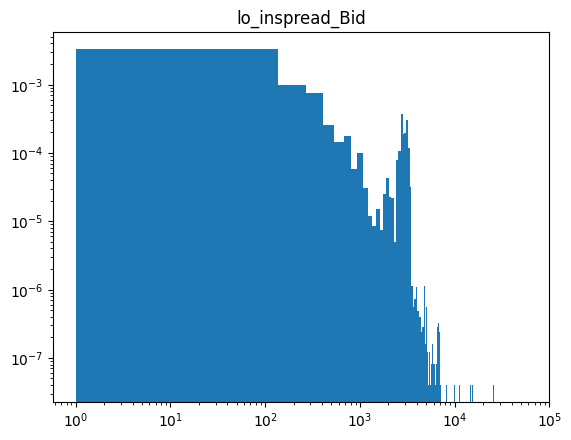

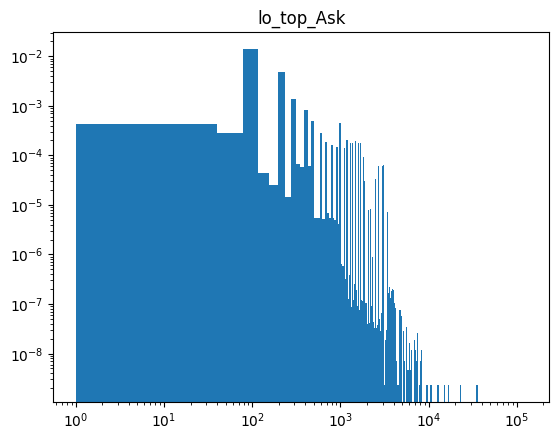

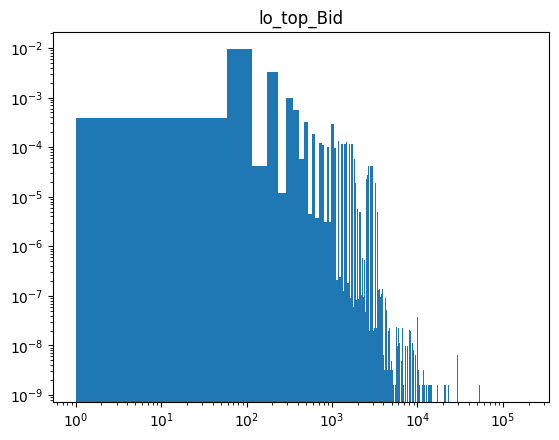

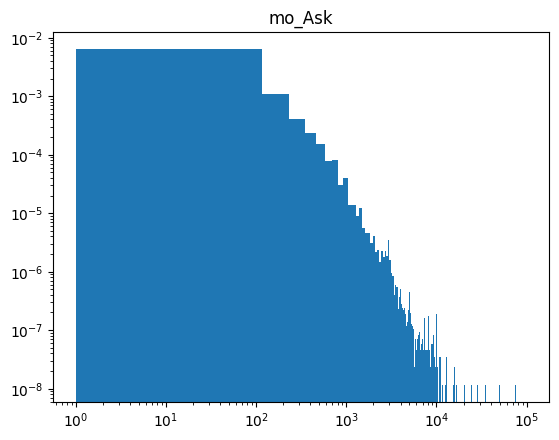

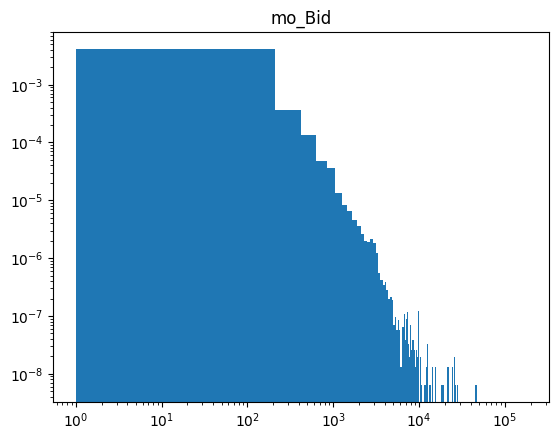

In [12]:
hists = {}
for k, v in sizes.items():
    fig = plt.figure()
    n, bins, _ = plt.hist(v, bins = "sqrt", density = True)
    hists[k] = (n, bins)
    plt.title(k)    
    plt.xscale("log")
    plt.yscale("log")
    plt.show()

In [66]:
params = {}
roundNums = [1,10,50,100,200,500]
for k,v in hists.items():
    print(k)
    edges = v[1]
    
    params_rN = {}
    for r in roundNums:
        idx = np.searchsorted(edges, r)
        params_rN[r] = v[0][idx]
    params[k] = params_rN

co_deep_Ask
co_deep_Bid
co_top_Ask
co_top_Bid
lo_deep_Ask
lo_deep_Bid
lo_inspread_Ask
lo_inspread_Bid
lo_top_Ask
lo_top_Bid
mo_Ask
mo_Bid


In [67]:
for k, v in sizes.items():
    v = np.array(v)
    d = params[k]
    i = [x not in roundNums for x in v]
    d[0] = 1./np.average(v[i])
    params[k] = d

In [68]:
paramsFinal = {}
for c in ["lo_top", "lo_deep", "lo_inspread", "mo"]:
    b = params[c+"_Bid"] 
    a = params[c+"_Ask"] 
    paramsFinal[c+"_Bid"] = [(a[0]+b[0])/2, [(i, (a[i]+b[i])/2) for i in roundNums]]

In [69]:
paramsFinal

{'lo_top_Bid': [0.0012032594626957276,
  [(1, 0.0004058911201508531),
   (10, 0.004937100775363866),
   (50, 0.011839578897579354),
   (100, 4.2540607105295814e-05),
   (200, 1.3215923263800984e-05),
   (500, 4.946493652744191e-06)]],
 'lo_deep_Bid': [0.001446173610413779,
  [(1, 0.0009504555025436379),
   (10, 0.005970974450434397),
   (50, 0.011838812712121737),
   (100, 7.747866832159131e-05),
   (200, 4.951687702705543e-06),
   (500, 1.4416468076059402e-06)]],
 'lo_inspread_Bid': [0.0005940490977412251,
  [(1, 0.0028645165426634195),
   (10, 0.0007559432806511614),
   (50, 0.0007559432806511614),
   (100, 0.0007559432806511614),
   (200, 0.0006377821948293843),
   (500, 0.00011229632687737945)]],
 'mo_Bid': [0.0038746648120546903,
  [(1, 0.005292089328158008),
   (10, 0.0007267533052621235),
   (50, 0.0007267533052621235),
   (100, 0.0007267533052621235),
   (200, 0.0003865080466058066),
   (500, 6.402501409270695e-05)]]}

In [70]:
queues = {}
for d in pd.date_range(dt.date(2019,1,2), dt.date(2019,3,31)):
    try:
        data = pd.read_csv("/SAN/fca/Konark_PhD_Experiments/extracted/"+ric+"_"+ d.strftime("%Y-%m-%d") +"_12D.csv")
    except: 
        continue
    queues["Ask Size 1"] = np.append(queues.get("Ask Size 1", []) , data["Ask Size 1"].values)
    queues["Ask Size 2"] = np.append(queues.get("Ask Size 2", []) , data["Ask Size 2"].values)
    queues["Bid Size 1"] = np.append(queues.get("Bid Size 1", []) , data["Bid Size 1"].values)
    queues["Bid Size 2"] = np.append(queues.get("Bid Size 2", []) , data["Bid Size 2"].values)

/home/konajain/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


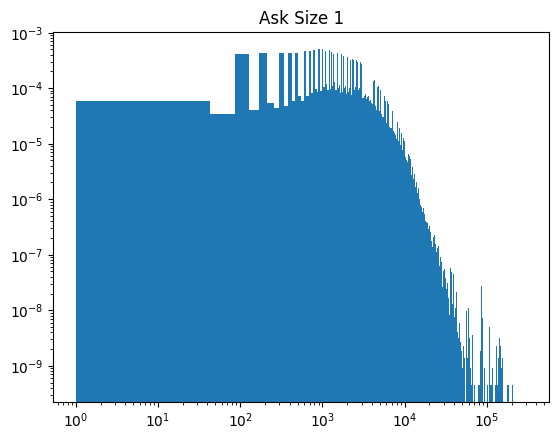

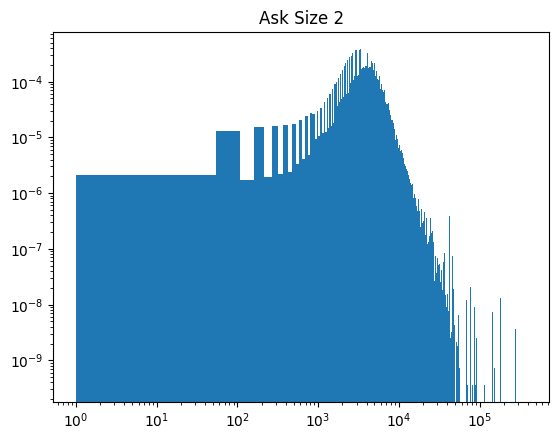

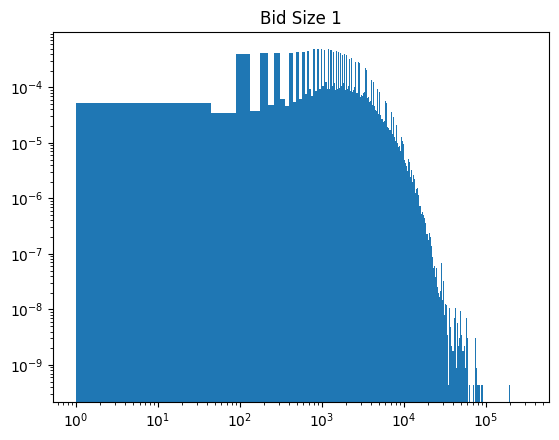

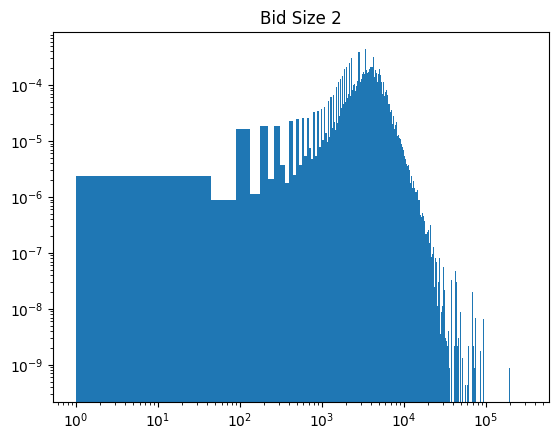

In [71]:
hists = {}
for k, v in queues.items():
    fig = plt.figure()
    n, bins, _ = plt.hist(v, bins = "sqrt", density = True)
    hists[k] = (n, bins)
    plt.title(k)    
    plt.xscale("log")
    plt.yscale("log")
    plt.show()

In [72]:
params = {}
roundNums = [1,10,50,100,200,500,1000]
for k,v in hists.items():
    print(k)
    edges = v[1]
    
    params_rN = {}
    for r in roundNums:
        idx = np.searchsorted(edges, r)
        params_rN[r] = v[0][idx]
    params[k] = params_rN

Ask Size 1
Ask Size 2
Bid Size 1
Bid Size 2


In [73]:
for k, v in queues.items():
    v = np.array(v)
    d = params[k]
    i = [x not in roundNums for x in v]
    d[0] = 1./np.average(v[i])
    params[k] = d

In [74]:
params

{'Ask Size 1': {1: 5.8388485914158164e-05,
  10: 3.42684025700379e-05,
  50: 0.0004150937775136234,
  100: 4.0095534226161994e-05,
  200: 5.359271705057228e-05,
  500: 7.31055016142873e-05,
  1000: 0.0001067058572147859,
  0: 0.00032383827179001124},
 'Ask Size 2': {1: 2.1164126820621204e-06,
  10: 1.2752418187758843e-05,
  50: 1.2752418187758843e-05,
  100: 1.7428003167032238e-06,
  200: 1.915125399950157e-06,
  500: 3.313275550159514e-06,
  1000: 1.0479609631825552e-05,
  0: 0.0002268283869376001},
 'Bid Size 1': {1: 5.268842536388492e-05,
  10: 3.3966372458073674e-05,
  50: 0.0004007992604232224,
  100: 3.811604499005174e-05,
  200: 4.754592662877553e-05,
  500: 6.259001967243646e-05,
  1000: 0.00010636224494259035,
  0: 0.0003388929106096549},
 'Bid Size 2': {1: 2.3349755663418974e-06,
  10: 8.896186893502769e-07,
  50: 1.6311572190959622e-05,
  100: 1.1416700248474534e-06,
  200: 2.0969270828167854e-06,
  500: 3.764141645740823e-06,
  1000: 1.033497993363247e-05,
  0: 0.0002384529

In [75]:
paramsFinal = {}
for c in [" Size 1", " Size 2"]:
    b = params["Bid"+c] 
    a = params["Ask" + c] 
    id = "deep"
    if c == " Size 1": id = "touch"
    paramsFinal["Ask_" + id] = [(a[0]+b[0])/2, [(i, (a[i]+b[i])/2) for i in roundNums]]
paramsFinal

{'Ask_touch': [0.00033136559119983304,
  [(1, 5.5538455639021544e-05),
   (10, 3.411738751405578e-05),
   (50, 0.0004079465189684229),
   (100, 3.910578960810687e-05),
   (200, 5.05693218396739e-05),
   (500, 6.784776064336188e-05),
   (1000, 0.00010653405107868813)]],
 'Ask_deep': [0.00023264066631313243,
  [(1, 2.225694124202009e-06),
   (10, 6.82101843855456e-06),
   (50, 1.4531995189359232e-05),
   (100, 1.4422351707753386e-06),
   (200, 2.006026241383471e-06),
   (500, 3.5387085979501684e-06),
   (1000, 1.0407294782729011e-05)]]}

In [1]:
import yfinance as yf
yf.download("TSLA", start='2024-08-29', end='2022-08-30', interval="1m")

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['TSLA']: Exception('%ticker%: 1m data not available for startTime=1661745600 and endTime=1661832000. The requested range must be within the last 30 days.')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
